1. Import dependencies:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pickle
import streamlit as st
import streamlit as st

2. Data Collection:

A- Loading data:

In [2]:
data_obesity = pd.read_csv('C:/Machine_learning Python/projets/obesityPrediction/obesity_data.csv')

B- Head of the data:

In [3]:
data_obesity.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


C- Number of row and columns:

In [4]:
data_obesity.shape

(1000, 7)

D- Information about the data:

In [5]:
data_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


2. Statisctical measures :

A- General statistics:

In [6]:
data_obesity.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


B- Number of missing value:

In [7]:
data_obesity.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

3. Visualisation:

A- The distrubution of the gender columns:

C:\Users\HP\AppData\Local\Temp\ipykernel_19220\1994219091.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data_obesity , x = 'Gender' , palette= 'deep')


<Axes: xlabel='Gender', ylabel='count'>

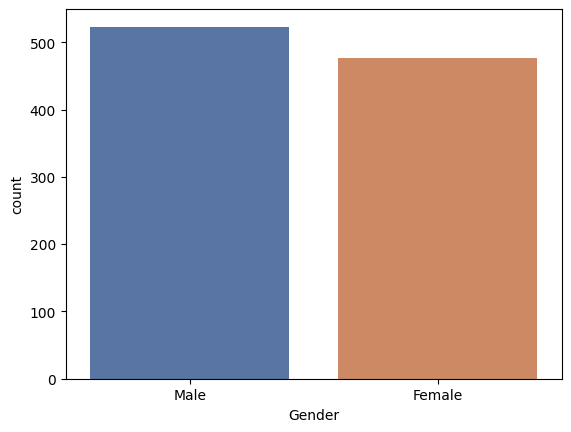

In [8]:
sns.countplot(data= data_obesity , x = 'Gender' , palette= 'deep')

B- Weight Distribution by Obesity Category:

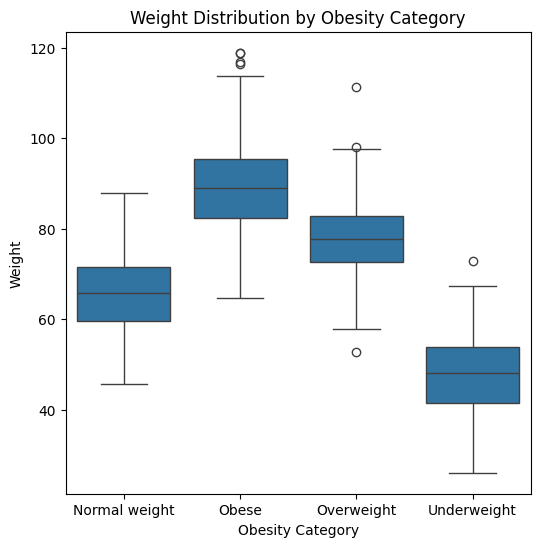

In [9]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='ObesityCategory', y='Weight', data=data_obesity)
plt.title('Weight Distribution by Obesity Category')
plt.xlabel('Obesity Category')
plt.ylabel('Weight')
plt.show()

C- Weight Distribution by Obesity Category

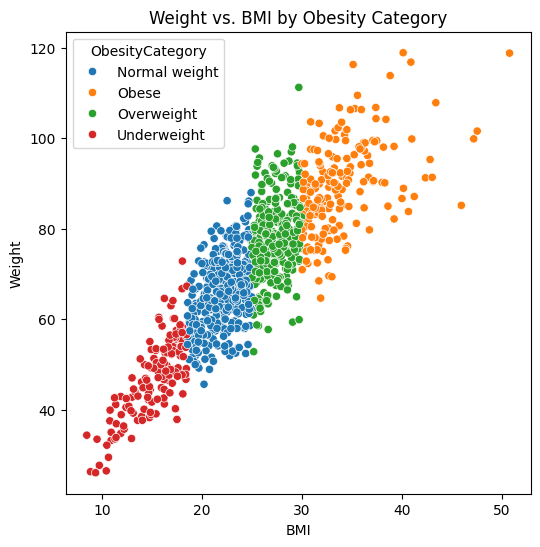

In [10]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='BMI', y='Weight', hue='ObesityCategory', data=data_obesity)
plt.title('Weight vs. BMI by Obesity Category')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.show()

D- Distribution of Physical Activity Levels

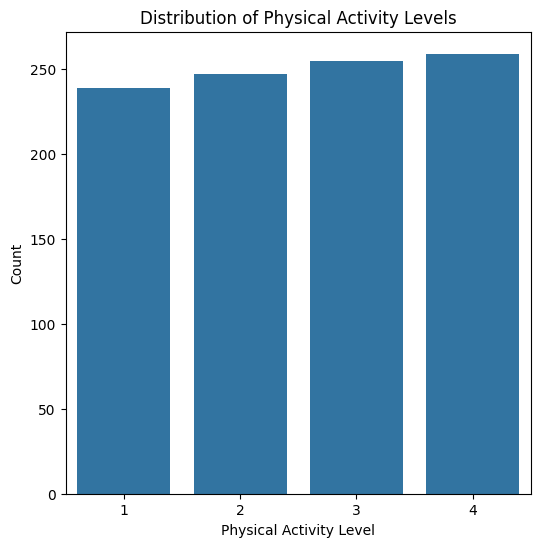

In [11]:
plt.figure(figsize=(6, 6))
sns.countplot(x='PhysicalActivityLevel', data=data_obesity)
plt.title('Distribution of Physical Activity Levels')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()

4. Label Encoding:

A- Distribution of categorical data:

In [12]:
print(data_obesity.Gender.value_counts())
print(data_obesity.ObesityCategory.value_counts())

Gender
Male      523
Female    477
Name: count, dtype: int64
ObesityCategory
Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: count, dtype: int64


B. Encoding the categorical data:

In [13]:
data_obesity.replace({"Gender": {'Male':1,'Female':0 }}, inplace=True)
data_obesity.replace({"ObesityCategory": {'Normal weight':1 ,'Overweight':2 ,'Obese':3 , 'Underweight':4  }}, inplace=True)
data_obesity.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,1
1,69,1,164.127306,89.959256,33.395209,2,3
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,1


In [14]:
print(data_obesity.Gender.value_counts())
print(data_obesity.ObesityCategory.value_counts())

Gender
1    523
0    477
Name: count, dtype: int64
ObesityCategory
1    371
2    295
3    191
4    143
Name: count, dtype: int64


5. Train test split:

A- Separating data & lables: 

In [15]:
X = data_obesity.drop(columns= ['ObesityCategory'] , axis= 1)
Y = data_obesity['ObesityCategory']

B- Test Split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [17]:
print(X.shape,X_train.shape, X_test.shape)

(1000, 6) (800, 6) (200, 6)


6. Training the model (SVM):

A- Creating the model:

In [18]:
model = svm.SVC(kernel= 'linear')

B- Training the model:

In [19]:
model.fit(X_train , Y_train)

SVC(kernel='linear')

7. Model Evaluation :


A- Accuracy score of training data:

In [20]:
X_train_prediction = model.predict(X_train)
data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', data_accuracy)

Accuracy on training data :  0.99375


B- Accuracy score of testing data:

In [21]:
X_test_prediction = model.predict(X_test)
data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on testing data : ', data_accuracy)

Accuracy on testing data :  0.975


In [22]:
data_obesity.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,1
1,69,1,164.127306,89.959256,33.395209,2,3
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,1


8. Example:

In [24]:
def  prediction_obesity(Age,Gender,Height,Weight,BMI,PhysicalActivityLevel):
    input_data = (Age,Gender,Height,Weight,BMI,PhysicalActivityLevel)
    #Input the data into the numpy array:
    input_dataNumpuy = np.asarray(input_data)
    #Reshape the data:
    input_dataReshaped = input_dataNumpuy.reshape(1,-1)
    prediction = model.predict(input_dataReshaped)
    return prediction[0]




print("Welcome to our model")
Gender = int(input("Enter your gender (1: male, 0: female): "))
Age = int(input("Enter your age: "))
Height = float(input("Enter your height: "))
Weight = float(input("Enter your weight: "))
BMI = float(input("Enter the BMI : "))
PhysicalActivityLevel = float(input("Enter your physical activity level : "))

obs = prediction_obesity(Age,Gender,Height,Weight,BMI,PhysicalActivityLevel)
if obs == 1:
    test = 'Normal weight'
elif obs == 2:
    test = 'Overweight'
if obs == 3:
    test = 'Obese'
if obs == 1:
    test = 'Underweight'
print("Your obesity is: ", test)

Welcome to our model
Your obesity is:  Obese


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


9. Deployment:

A- Saving the model:

In [41]:
pickle.dump(model, open('obesity_model.sav','wb'))

B- Loading the model:

In [42]:
load_model = pickle.load(open('obesity_model.sav' , 'rb'))

C- The main function of the stream:

In [ ]:
def main():
    st.title('Obesity Calories Web APP')
    Gender = int(input("Enter your gender (1: male, 0: female): "))
    Age = int(input("Enter your age: "))
    Height = float(input("Enter your height: "))
    Weight = float(input("Enter your weight: "))
    BMI = float(input("Enter the BMI : "))
    PhysicalActivityLevel = float(input("Enter your physical activity level : "))

    test = ''
    if st.button('Calories Test Result'):
        test =  prediction_obesity([Age,Gender,Height,Weight,BMI,PhysicalActivityLevel])
        st.success(test)


if (__name__ == '__main__') :
    main()

In [48]:
!streamlit run 'C:/Machine_learning Python/projetso/besityPrediction/main.py'

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, but the provided file has no extension.
For more information, please see https://docs.streamlit.io
